In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("rent-data.csv")

In [7]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31
0,102001,0,United States,country,NaN,1204.964064,1211.523337,1220.539083,1229.631503,1238.971442,...,1974.484122,1984.038303,1988.713282,1989.992642,1986.229219,1983.095297,1979.579221,1984.061547,1992.382332,2005.108941
1,394913,1,"New York, NY",msa,NY,2274.903988,2289.780685,2308.292159,2328.700819,2343.991452,...,3270.656162,3288.406598,3293.793228,3283.167886,3268.389133,3256.816076,3250.841738,3261.024948,3281.796807,3313.331883
2,753899,2,"Los Angeles, CA",msa,CA,1807.141280,1819.683413,1836.319303,1850.460938,1864.975841,...,2917.827829,2932.130095,2938.162398,2942.386297,2939.386912,2935.736684,2928.205711,2950.268103,2972.333872,2997.269136
3,394463,3,"Chicago, IL",msa,IL,1429.049735,1435.936653,1445.858633,1455.233797,1465.724849,...,2080.783276,2090.849551,2094.402214,2092.927997,2091.194710,2092.516081,2096.305554,2103.605019,2119.863071,2138.626729
4,394514,4,"Dallas, TX",msa,TX,1109.399485,1114.367197,1122.200307,1134.267945,1144.231583,...,1774.230617,1781.419709,1784.736695,1781.088672,1773.851017,1765.211269,1758.119108,1756.314712,1762.101968,1773.313924


In [9]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
       ...
       '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
       '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31'],
      dtype='object', length=128)

In [11]:
df.shape

(649, 128)

In [13]:
df.iloc[0]

RegionID             102001
SizeRank                  0
RegionName    United States
RegionType          country
StateName               NaN
                  ...      
2024-11-30      1983.095297
2024-12-31      1979.579221
2025-01-31      1984.061547
2025-02-28      1992.382332
2025-03-31      2005.108941
Name: 0, Length: 128, dtype: object

In [17]:
df_long = df.melt( 
    id_vars =["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"],
    var_name="Date",
    value_name="Rent"
)

In [19]:
df_long.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Rent
0,102001,0,United States,country,NaN,2015-01-31,1204.964064
1,394913,1,"New York, NY",msa,NY,2015-01-31,2274.903988
2,753899,2,"Los Angeles, CA",msa,CA,2015-01-31,1807.141280
3,394463,3,"Chicago, IL",msa,IL,2015-01-31,1429.049735
4,394514,4,"Dallas, TX",msa,TX,2015-01-31,1109.399485


In [21]:
df_long.isnull().sum()

RegionID          0
SizeRank          0
RegionName        0
RegionType        0
StateName       123
Date              0
Rent          37576
dtype: int64

In [23]:
df_long["Date"] = pd.to_datetime(df_long["Date"])

In [25]:
df_long.dtypes

RegionID               int64
SizeRank               int64
RegionName            object
RegionType            object
StateName             object
Date          datetime64[ns]
Rent                 float64
dtype: object

In [27]:
df_long[df_long["StateName"].isnull()].head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Rent
0,102001,0,United States,country,NaN,2015-01-31,1204.964064
649,102001,0,United States,country,NaN,2015-02-28,1211.523337
1298,102001,0,United States,country,NaN,2015-03-31,1220.539083
1947,102001,0,United States,country,NaN,2015-04-30,1229.631503
2596,102001,0,United States,country,NaN,2015-05-31,1238.971442


In [29]:
df_long[df_long["Rent"].isnull()].sample(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Rent
41106,394872,222,"Monroe, LA",msa,LA,2020-04-30,NaN
31013,394432,553,"Calhoun, GA",msa,GA,2018-12-31,NaN
30940,394541,450,"DuBois, PA",msa,PA,2018-12-31,NaN
1142,394693,528,"Hudson, NY",msa,NY,2015-02-28,NaN
25913,394745,744,"Kill Devil Hills, NC",msa,NC,2018-04-30,NaN


In [33]:
df_long["RegionName"].unique()

array(['United States', 'New York, NY', 'Los Angeles, CA', 'Chicago, IL',
       'Dallas, TX', 'Houston, TX', 'Washington, DC', 'Philadelphia, PA',
       'Miami, FL', 'Atlanta, GA', 'Boston, MA', 'Phoenix, AZ',
       'San Francisco, CA', 'Riverside, CA', 'Detroit, MI', 'Seattle, WA',
       'Minneapolis, MN', 'San Diego, CA', 'Tampa, FL', 'Denver, CO',
       'Baltimore, MD', 'St. Louis, MO', 'Orlando, FL', 'Charlotte, NC',
       'San Antonio, TX', 'Portland, OR', 'Sacramento, CA',
       'Pittsburgh, PA', 'Cincinnati, OH', 'Austin, TX', 'Las Vegas, NV',
       'Kansas City, MO', 'Columbus, OH', 'Indianapolis, IN',
       'Cleveland, OH', 'San Jose, CA', 'Nashville, TN',
       'Virginia Beach, VA', 'Providence, RI', 'Jacksonville, FL',
       'Milwaukee, WI', 'Oklahoma City, OK', 'Raleigh, NC', 'Memphis, TN',
       'Richmond, VA', 'Louisville, KY', 'New Orleans, LA',
       'Salt Lake City, UT', 'Hartford, CT', 'Buffalo, NY',
       'Birmingham, AL', 'Rochester, NY', 'Grand Rapids

In [35]:
df_long_clean = df_long.dropna(subset=["Rent", "StateName"])

In [37]:
df_long_clean["RegionName"].unique()

array(['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Dallas, TX',
       'Houston, TX', 'Washington, DC', 'Philadelphia, PA', 'Miami, FL',
       'Atlanta, GA', 'Boston, MA', 'Phoenix, AZ', 'San Francisco, CA',
       'Riverside, CA', 'Detroit, MI', 'Seattle, WA', 'Minneapolis, MN',
       'San Diego, CA', 'Tampa, FL', 'Denver, CO', 'Baltimore, MD',
       'St. Louis, MO', 'Orlando, FL', 'Charlotte, NC', 'San Antonio, TX',
       'Portland, OR', 'Sacramento, CA', 'Pittsburgh, PA',
       'Cincinnati, OH', 'Austin, TX', 'Las Vegas, NV', 'Kansas City, MO',
       'Columbus, OH', 'Indianapolis, IN', 'Cleveland, OH',
       'San Jose, CA', 'Nashville, TN', 'Virginia Beach, VA',
       'Providence, RI', 'Jacksonville, FL', 'Milwaukee, WI',
       'Oklahoma City, OK', 'Raleigh, NC', 'Memphis, TN', 'Richmond, VA',
       'Louisville, KY', 'New Orleans, LA', 'Salt Lake City, UT',
       'Hartford, CT', 'Buffalo, NY', 'Birmingham, AL', 'Rochester, NY',
       'Grand Rapids, MI', 'Tucson, A

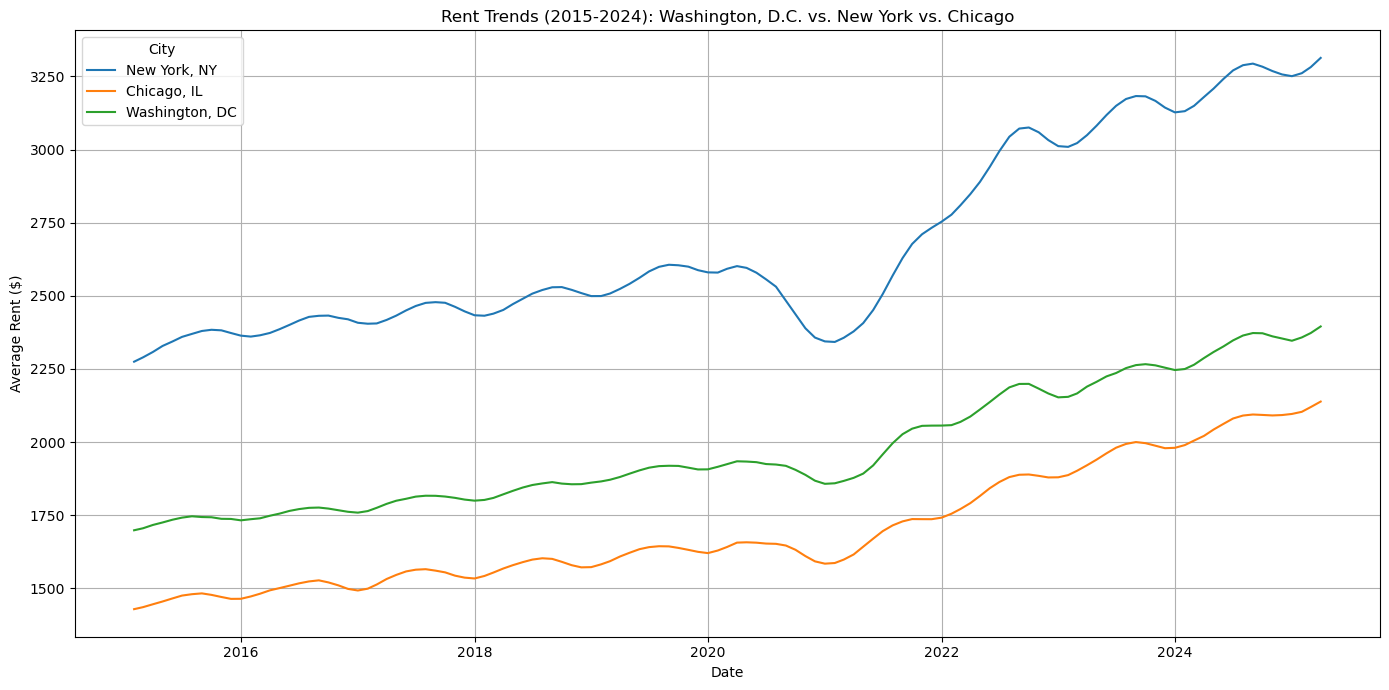

In [78]:
cities = ["Washington, DC", "New York, NY", "Chicago, IL"]
df_subset = df_long_clean[df_long_clean["RegionName"].isin(cities)]
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_subset, x="Date", y="Rent", hue="RegionName")
plt.title("Rent Trends (2015-2024): Washington, D.C. vs. New York vs. Chicago")
plt.xlabel("Date")
plt.ylabel("Average Rent ($)")
plt.legend(title="City")
plt.grid(True)
plt.tight_layout()
plt.savefig("visuals/rent_trends_line_chart.png")
plt.show()

In [53]:
dfsubset = df_subset.sort_values(by=["RegionName", "Date"])
rent_summary = df_subset.groupby("RegionName").agg(
    start_rent=("Rent", "first"),
    end_rent=("Rent", "last")
)

In [55]:
rent_summary["percent_change"] = ((rent_summary["end_rent"] - rent_summary["start_rent"]) / rent_summary["start_rent"]) * 100

In [57]:
rent_summary.round(2)

,start_rent,end_rent,percent_change
RegionName,,,
"Chicago, IL",1429.05,2138.63,49.65
"New York, NY",2274.90,3313.33,45.65
"Washington, DC",1698.69,2395.36,41.01


In [59]:
rent_summary_sorted = rent_summary.sort_values("percent_change", ascending=False)

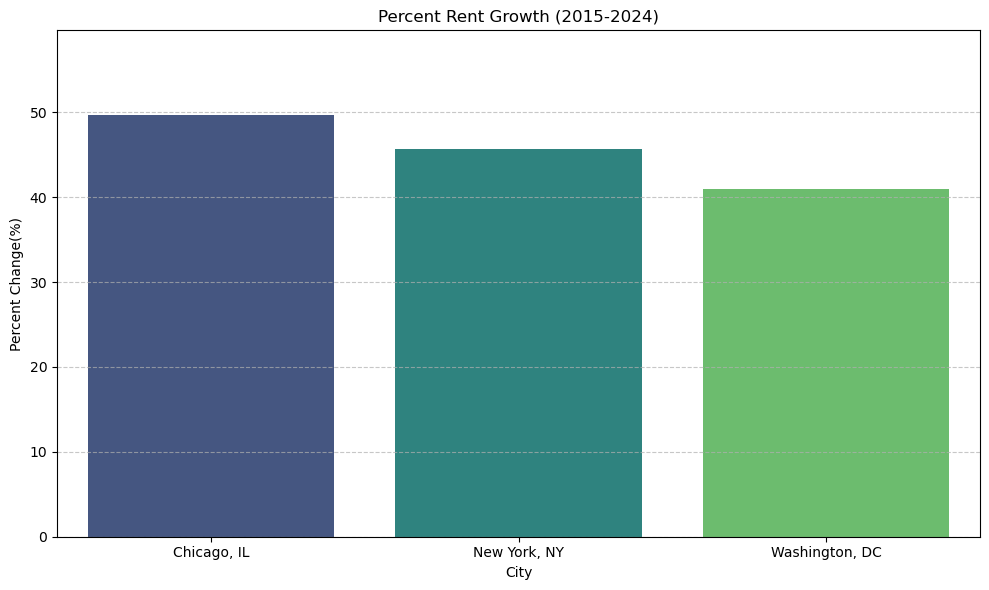

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=rent_summary_sorted.reset_index(),
    x="RegionName",
    y="percent_change",
    hue="RegionName",
    palette="viridis",
    dodge=False,
    legend=False
)

plt.title("Percent Rent Growth (2015-2024)")
plt.ylabel("Percent Change(%)")
plt.xlabel("City")
plt.ylim(0, rent_summary["percent_change"].max() + 10) #Space on top
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("visuals/rent_growth_percent_bar.png")
plt.show()

In [70]:
income_df = pd.read_csv("global_housing_market_extended.csv")

In [72]:
income_df.head()

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399
